In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from keras.datasets import fashion_mnist


# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Передобробка даних
x_train = x_train.reshape(x_train.shape[0], 28 * 28).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28 * 28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Створення моделі
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Компіляція моделі
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.7436 - accuracy: 0.7438 - val_loss: 0.4706 - val_accuracy: 0.8316
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5097 - accuracy: 0.8190 - val_loss: 0.4405 - val_accuracy: 0.8425
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4697 - accuracy: 0.8328 - val_loss: 0.4059 - val_accuracy: 0.8538
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4497 - accuracy: 0.8389 - val_loss: 0.4426 - val_accuracy: 0.8420
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4349 - accuracy: 0.8446 - val_loss: 0.3977 - val_accuracy: 0.8573
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4241 - accuracy: 0.8486 - val_loss: 0.3830 - val_accuracy: 0.8622
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4173 - accuracy: 0.8502 - val_loss: 0.3909 - val_accuracy: 0.8596

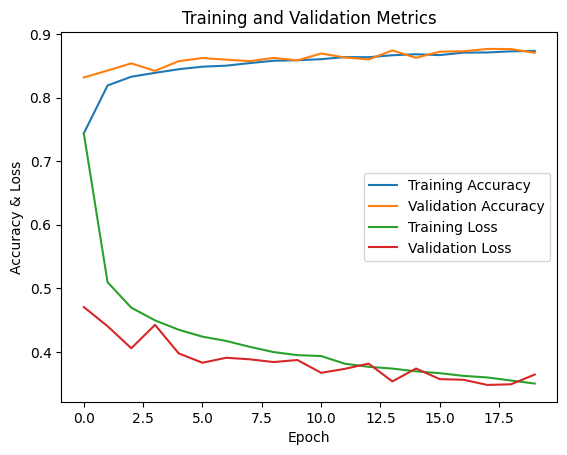

In [7]:
# Побудова графіка
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy & Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

In [8]:
# Оцінка точності
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8704000115394592
